<a href="https://colab.research.google.com/github/baothai20146117/AI/blob/main/w3_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-22-7f04d968f874>:47: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-22-7f04d968f874>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-22-7f04d968f874>:49: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


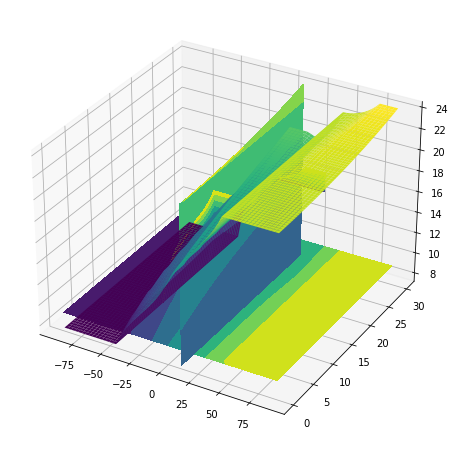

In [ ]:
from networkx.algorithms.bipartite import projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
universe = np.linspace(-90,90,61)
universe1 = np.linspace(0,30,61)
angle = ctrl.Antecedent(universe,'Angle')
velocity = ctrl.Antecedent(universe,'Velocity')
force = ctrl.Consequent(universe1,'Force')

name = ['-2','-1','0','1','2']
name1 = ['Very Strong','Strong','Average','Weak','Very Weak']
angle.automf(names=name)
velocity.automf(names =name)
force.automf(names = name1)

#angle.view()
#velocity.view()


rule1 = ctrl.Rule(antecedent=((angle['-2']&velocity['-2'])|(angle['-1']&velocity['-2'])|(angle['-1']&velocity['-1'])|(angle['-2']&velocity['-1'])),consequent=force['Very Strong'],label='rule VP')
rule2 = ctrl.Rule(antecedent=((angle['-2']&velocity['0'])|(angle['-2']&velocity['1'])|(angle['-2']&velocity['2'])|(angle['-1']&velocity['0']|(angle['-1']&velocity['1'])|(angle['0']&velocity['-2'])|(angle['0']&velocity['-1'])
|(angle['1']&velocity['-2'])|(angle['1']&velocity['-1'])|(angle['2']&velocity['-2']))),consequent=force['Strong'],label='rule P')
rule3 = ctrl.Rule(antecedent=((angle['-1']&velocity['2'])|(angle['0']&velocity['0'])|(angle['2']&velocity['-1'])),consequent=force['Average'],label='rule A')
rule4 = ctrl.Rule(antecedent=((angle['0']&velocity['1'])|(angle['0']&velocity['2'])|(angle['1']&velocity['0'])|(angle['1']&velocity['1'])|(angle['2']&velocity['0'])),consequent=force['Weak'],label='rule G')
rule5 = ctrl.Rule(antecedent=((angle['1']&velocity['2'])|(angle['2']&velocity['1'])|(angle['2']&velocity['2'])),consequent=force['Very Weak'],label='rule VG')

force_ctrl= ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5])
sim= ctrl.ControlSystemSimulation(force_ctrl,flush_after_run=61*61+1)
upsampled1 = np.linspace(-90,90,61)
upsampled2 = np.linspace(0,30,61)

x,y, = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['Angle']=x[i,j]
    sim.input ['Velocity']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['Force']

fig = plt.figure(figsize=(8,8))
ax =fig.add_subplot(111,projection='3d')

suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)

ax.view_init(30,300)








In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=458075c5f25edf7cf2c4d12d49133a6559cc012ebce81f5002295a03ed9c3307
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl